## Loading essential libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2024-09-10 13:42:21.357669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 13:42:21.374530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 13:42:21.379431: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 13:42:21.392114: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 13:42:22.169165: W tensorflow/compiler/tf2

## Importing Test dataset

In [2]:
df = pd.read_excel("/media/mrk/Data/E-JUST/publication/Exp_speed/Exp_speed_new/data_set.xlsx", sheet_name='FNN_train')
df.head()

,Disturbance Y/M/D (UT),CME start_time,Vp,Vlat,Vfrt,Vsw,2aw,Tobs
0,2000/02/20 2139,2000/02/17 2006,566.508044,452,82.5,460,92.0,73.55
1,2000/04/06 1639,2000/04/04 1632,865.890828,379,123.0,620,124.0,48.12
2,2000/04/18 2000,2000/04/15 1035,511.749775,409,100.5,470,94.0,81.42
3,2000/05/02 1045,2000/04/29 0430,532.481363,337,130.0,860,172.0,78.25
4,2000/05/13 1700,2000/05/10 2006,604.741171,237,98.0,600,120.0,68.90


### Selecting data features

In [3]:
X = df[df.columns[2:-1]].values
y = df[df.columns[-1]].values.reshape(-1,1)

# print(X[:5])
# print(y[:5])

### Feature Scaling

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

x_sc = StandardScaler()
y_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_val = x_sc.fit_transform(X_val)
y_train = y_sc.fit_transform(y_train)
y_val = y_sc.fit_transform(y_val)


# print(X_train[:5])
# print(y_train[:5])


## Defining Neural Network model

Epoch 1/111


/home/mrk/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.7807 - mae: 0.7807 - val_loss: 0.7386 - val_mae: 0.7386
Epoch 2/111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8088 - mae: 0.8088 - val_loss: 0.6875 - val_mae: 0.6875
Epoch 3/111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7439 - mae: 0.7439 - val_loss: 0.6249 - val_mae: 0.6249
Epoch 4/111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7153 - mae: 0.7153 - val_loss: 0.5504 - val_mae: 0.5504
Epoch 5/111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6047 - mae: 0.6047 - val_loss: 0.4695 - val_mae: 0.4695
Epoch 6/111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5236 - mae: 0.5236 - val_loss: 0.4172 - val_mae: 0.4172
Epoch 7/111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5117 - mae: 0.5117 - val_loss: 0.3784 - val_mae: 0.3784
Epoch 8/111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4227 - mae: 0.4227 - val_loss: 0.3458 - val_mae: 0.3458
Epoch 9/111
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3524 - mae: 0.

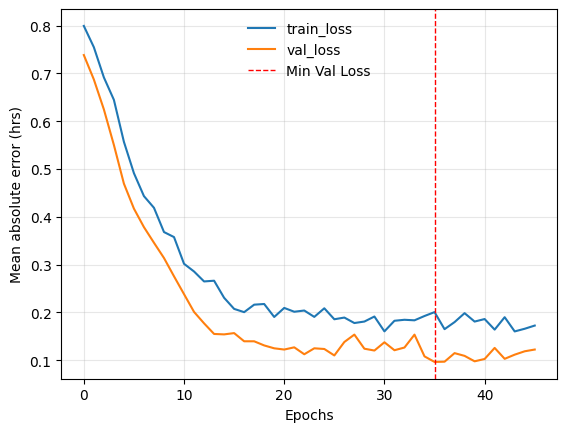

In [11]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(62, activation ='leaky_relu', input_shape=(5,)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(40, activation ='leaky_relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(35, activation ='leaky_relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(62, activation ='leaky_relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation  ='linear')
])

model.compile(optimizer= Adam(learning_rate=0.0001), loss = 'mae', metrics=['mae'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=111, batch_size=3, validation_data=(X_val, y_val), callbacks=[early_stopping])


def plot_history(history):
  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Mean absolute error (hrs)')
  plt.legend(frameon=0)
  plt.grid(True, alpha=0.3)

  # Find the minimum validation loss epoch
  min_val_loss_epoch = np.argmin(history.history['val_loss'])
  min_val_loss = history.history['val_loss'][min_val_loss_epoch]

  # Draw a vertical dashed line at the minimum validation loss epoch
  plt.axvline(x=min_val_loss_epoch, color='r', linestyle='dashed', linewidth=1, label='Min Val Loss')
  plt.legend(frameon=0)

  plt.show()
display = plot_history(history)


## Test dataset

### Loading test data

In [110]:
df1 = pd.read_excel("/media/mrk/Data/E-JUST/publication/Exp_speed/Exp_speed_new/data_set.xlsx", sheet_name='FNN_test')
df1.head()

,Disturbance Y/M/D (UT),CME start_time,Vt,Vlat,Vfrt,Vsw,2aw,Tobs
0,2000/01/22 0023,2000/01/18 1754,530.920829,266,85.5,400,80,78.48
1,2000/02/11 0258,2000/02/08 0930,636.423807,294,94.5,510,102,65.47
2,2000/02/11 2352,2000/02/10 0230,918.374844,378,121.5,590,118,45.37
3,2000/02/14 0731,2000/02/12 0431,816.993464,364,117.0,680,136,51.00
4,2001/01/23 1048,2001/01/20 2130,679.717238,280,90.0,550,110,61.30


### Feature selecting and scaling

In [111]:
X_test = df1[df1.columns[2:-1]].values
y_test = df1[df1.columns[-1]].values.reshape(-1,1)


X_test = x_sc.fit_transform(X_test)
y_test = y_sc.fit_transform(y_test)
print(X_test[:5])
print()
print(y_test[:5])

[[-0.63 -0.63 -0.92 -1.12 -1.12]
 [-0.05 -0.2  -0.44 -0.16 -0.16]
 [ 1.49  1.08  1.02  0.54  0.54]
 [ 0.94  0.87  0.78  1.32  1.32]
 [ 0.19 -0.41 -0.68  0.19  0.19]]

[[ 0.36]
 [-0.23]
 [-1.15]
 [-0.9 ]
 [-0.42]]


### Predicting test data with Neural Network

In [114]:
from sklearn.metrics import r2_score
import random
random.seed(1234)


y_pred = model.predict(X_test)


print('R2 score:', r2_score(y_test, y_pred))
print('mean absolute error =', np.mean(np.abs(y_sc.inverse_transform(y_pred)-y_sc.inverse_transform(y_test))))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R2 score: 0.9431530841859033
mean absolute error = 3.8392450378417973


In [113]:
df1['Tfnn'] = y_sc.inverse_transform(y_pred)
# df1.to_excel('/home/mrk/Desktop/time.xlsx', index=False)

### Comparing true values and predicted values

In [107]:
random.seed(1234)
np.set_printoptions(precision=2)

y_test = y_sc.inverse_transform(y_test)
y_pred = y_sc.inverse_transform(y_pred)

print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)), 1))

[[ 85.19  78.48]
 [ 63.72  65.47]
 [ 44.09  45.37]
 [ 48.81  51.  ]
 [ 58.82  61.3 ]
 [ 69.31  68.52]
 [ 87.27  79.4 ]
 [ 47.    48.68]
 [ 46.05  47.7 ]
 [ 41.48  45.9 ]
 [ 47.71  50.98]
 [ 35.27  41.58]
 [ 47.1   49.52]
 [ 56.76  57.52]
 [ 43.21  45.08]
 [ 46.88  46.7 ]
 [ 58.7   58.52]
 [ 91.56  87.1 ]
 [ 49.54  52.7 ]
 [ 48.82  50.82]
 [110.41  99.08]
 [118.07 109.  ]
 [ 85.15  77.5 ]
 [103.62  92.1 ]
 [114.51 104.25]
 [ 70.39  71.1 ]
 [ 70.23  69.32]
 [125.63 123.23]
 [ 55.46  53.87]
 [ 61.25  63.4 ]
 [105.55 104.6 ]
 [ 43.07  46.78]
 [ 55.83  56.2 ]
 [108.18 110.18]
 [105.33  99.07]
 [ 51.49  50.95]
 [102.29  91.8 ]
 [109.01  97.47]
 [116.19 106.57]
 [ 49.91  51.18]
 [115.7  107.2 ]
 [ 55.89  57.77]
 [ 60.48  62.6 ]
 [ 65.86  66.62]
 [ 88.61  80.42]
 [ 49.37  50.87]
 [ 72.51  70.73]
 [ 79.66  79.  ]
 [ 65.96  66.32]
 [ 82.49  76.02]]


In [116]:

# model.save('/media/mrk/Data/E-JUST/publication/Exp_speed/Exp_speed_new.keras')